In [2]:
# Load necessary libraries
import sys
import os
import anndata as ad
import pandas as pd
import scanpy as sc
import seaborn as sns; sns.set(color_codes=True)



/home/apratapa/anaconda3/envs/rapidssc/lib/python3.8/site-packages/cupy/_environment.py:437: UserWarning: 
--------------------------------------------------------------------------------

  CuPy may not function correctly because multiple CuPy packages are installed
  in your environment:

    cupy, cupy-cuda115

  Follow these steps to resolve this issue:

    1. For all packages listed above, run the following command to remove all
       existing CuPy installations:

         $ pip uninstall <package_name>

      If you previously installed CuPy via conda, also run the following:

         $ conda uninstall cupy

    2. Install the appropriate CuPy package.
       Refer to the Installation Guide for detailed instructions.

         https://docs.cupy.dev/en/stable/install.html

--------------------------------------------------------------------------------

  warnings.warn(f'''


In [3]:
adata=sc.read_h5ad('data/figure7_mg_raw.h5ad')

In [4]:
adata

AnnData object with n_obs × n_vars = 48146 × 10
    obs: 'spatial_X', 'spatial_Y', 'Area', 'Area (µm^2)', 'ImageID', 'ImageType', 'Parent', 'Distance to nearest Plaque (µm)', 'numCellCentroids', 'Region'

In [5]:
phenotypes = pd.read_csv('data/figure7_clusters.csv')
adata.obs = phenotypes.copy()


In [6]:
import matplotlib.pyplot as plt
def plot_microglial_clusters(ss):
    ## Plot AD statistics
    dt = 'Distance to nearest Plaque (µm)'
    BINS  =[-1,0,5,10,15,20,30,50,75,100,200,500]
    out = pd.cut(ss.obs[dt],bins=BINS, right=True)
    ss.obs['Quantile'] = out.values
    
    fig,ax = plt.subplots(2,1,figsize=(8,8),gridspec_kw={'height_ratios': [1.6,1.2]})
    matpl=sc.pl.matrixplot(ss, var_names = ss.var_names,groupby='Quantile',show=False,vmin=-0.5, vmax=0.75,vcenter=0,
                 dendrogram=False, use_raw=False, cmap="inferno",standard_scale=None,return_fig=True,swap_axes=True)
    matpl.legend(show=False)
    import numpy as np
    sns.set_style("whitegrid", {'axes.grid' : False})
    oDF = ss.obs.groupby(['Quantile','leiden','ImageID']).size().T.reset_index().groupby(['Quantile','leiden']).mean().unstack(level=1).T.reset_index(drop=True)
    oDFPct = 100*oDF/oDF.sum(axis=0)
    oDFPct.T.plot(kind='bar',stacked=True,ax=ax[0],color=cMapDict, legend=True, )
    outputDF = oDFPct.copy()
    ax[0].legend(title='Cluster ID',loc=(1,0.0))
    ax[0].set_ylabel('Percentage of \n Microglial cells')
    ax[0].set_xlabel('')
    ax[0].set_xticks([])
    oDF =100.*ss.obs[ss.obs['numCellCentroids']>1].groupby(['Quantile'])[['numCellCentroids']].size()/ss.obs.groupby(['Quantile'])[['numCellCentroids']].size()
    oDFPct = oDF.T#/oDF.sum(axis=1)
    oDFPct.T.plot(kind='bar',stacked=True,ax=ax[1], legend=False, color='skyblue')
    ax[1].set_ylabel('% of cells that \n are Microglial clusters')
    ax[1].set_xlabel('Grouped distance to the nearest Plaque (µm)')
    ax[1].set_xticklabels(['[0]']+ax[1].get_xticklabels()[1:],rotation = 45)

    ax[1].set_ylim(0,max(50,oDFPct.max()))
    plt.tight_layout()
    return outputDF
# set colors for leiden clusters
cMapDict = {0: '#1f77b4',
 1: '#ff7f0e',
 2: '#279e68',
 3: '#d62728',
 4: '#aa40fc',
 5: '#8c564b',
 6: '#e377c2',
 7: '#b5bd61',
 8: '#17becf',
 9: '#aec7e8',
 10: '#ffbb78'}

In [7]:
# turn off warnings
import warnings
warnings.filterwarnings("ignore")

In [23]:
adata.obs

,Unnamed: 0,spatial_X,spatial_Y,Area,Area (µm^2),ImageID,ImageType,Parent,Distance to nearest Plaque (µm),numCellCentroids,Region,leiden
0,1790,13574.364621,11980.732852,277,61.1722,Ctl-3,Ctl,Grey Matter,348.1208,1.0,GM,3
1,1794,13491.046358,11876.990066,302,53.9108,Ctl-3,Ctl,Grey Matter,308.6889,1.0,GM,3
2,1795,14676.054795,11854.070776,438,82.4693,Ctl-3,Ctl,Grey Matter,432.9919,1.0,GM,2
3,1796,13395.029412,11854.349790,952,185.9480,Ctl-3,Ctl,Grey Matter,303.5456,1.0,GM,3
4,1797,15292.282609,11814.693237,828,171.9872,Ctl-3,Ctl,Grey Matter,353.9196,1.0,GM,2
...,...,...,...,...,...,...,...,...,...,...,...,...
48141,143982,39.883575,15885.947766,1589,269.7662,Ctl-2,Ctl,White Matter,NaN,1.0,WM,6
48142,143983,331.334215,15758.689594,1134,204.2505,Ctl-2,Ctl,White Matter,NaN,1.0,WM,2
48143,143986,140.715271,15603.225616,1015,172.7699,Ctl-2,Ctl,White Matter,NaN,1.0,WM,1
48144,143987,129.878453,15529.645304,1810,347.2530,Ctl-2,Ctl,White Matter,NaN,1.0,WM,6


Trying to set attribute `.obs` of view, copying.


... storing 'ImageID' as categorical
... storing 'ImageType' as categorical
... storing 'Parent' as categorical
... storing 'Region' as categorical


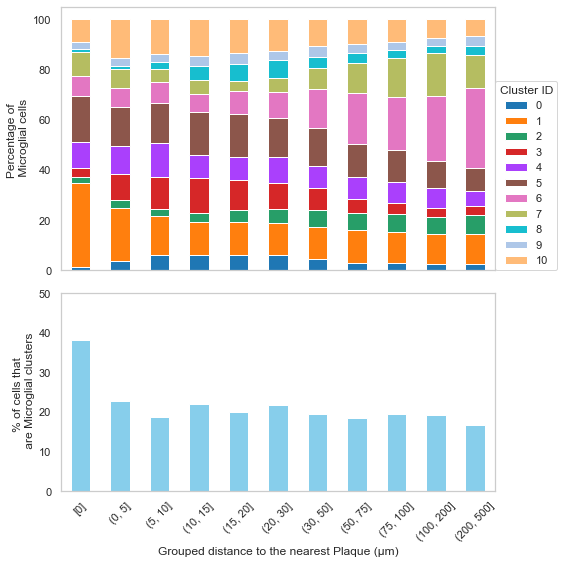

In [25]:

allAD = adata[adata.obs['ImageType']=='AD']
expectedDF = plot_microglial_clusters(allAD)

In [189]:
import matplotlib.pyplot as plt
def plot_microglial_clusters(ss):
    ## Plot AD statistics
    dt = 'Distance to nearest Plaque (µm)'
    BINS  =[-1,0,5,10,15,20,30,50,75,100,200,500]
    out = pd.cut(ss.obs[dt],bins=BINS, right=True)
    ss.obs['Quantile'] = out.values
    
    fig,ax = plt.subplots(2,1,figsize=(8,8),gridspec_kw={'height_ratios': [1.6,1.2]})
    matpl=sc.pl.matrixplot(ss, var_names = ss.var_names,groupby='Quantile',show=False,vmin=-0.5, vmax=0.75,vcenter=0,
                 dendrogram=False, use_raw=False, cmap="inferno",standard_scale=None,return_fig=True,swap_axes=True)
    matpl.legend(show=False)
    import numpy as np
    sns.set_style("whitegrid", {'axes.grid' : False})
    oDF = ss.obs.groupby(['Quantile','leiden','ImageID']).size().T.reset_index().groupby(['Quantile','leiden']).mean().unstack(level=1).T.reset_index(drop=True)
    oDFPct =oDF
    oDFPct.T.plot(kind='bar',stacked=True,ax=ax[0],color=cMapDict, legend=True, )
    outputDF = oDFPct.copy()
    ax[0].legend(title='Cluster ID',loc=(1,0.0))
    ax[0].set_ylabel('# of \n Microglial cells')
    ax[0].set_xlabel('')
    ax[0].set_xticks([])
    oDF =100.*ss.obs[ss.obs['numCellCentroids']>1].groupby(['Quantile'])[['numCellCentroids']].size()/ss.obs.groupby(['Quantile'])[['numCellCentroids']].size()
    oDFPct = oDF.T#/oDF.sum(axis=1)
    oDFPct.T.plot(kind='bar',stacked=True,ax=ax[1], legend=False, color='skyblue')
    ax[1].set_ylabel('% of cells that \n are Microglial clusters')
    ax[1].set_xlabel('Grouped distance to the nearest Plaque (µm)')
    ax[1].set_xticklabels(['[0]']+ax[1].get_xticklabels()[1:],rotation = 45)

    ax[1].set_ylim(0,max(50,oDFPct.max()))
    plt.tight_layout()
    return outputDF
# set colors for leiden clusters
cMapDict = {0: '#1f77b4',
 1: '#ff7f0e',
 2: '#279e68',
 3: '#d62728',
 4: '#aa40fc',
 5: '#8c564b',
 6: '#e377c2',
 7: '#b5bd61',
 8: '#17becf',
 9: '#aec7e8',
 10: '#ffbb78'}

Trying to set attribute `.obs` of view, copying.
... storing 'ImageID' as categorical
... storing 'ImageType' as categorical
... storing 'Parent' as categorical
... storing 'Region' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'ImageID' as categorical
... storing 'ImageType' as categorical
... storing 'Parent' as categorical
... storing 'Region' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'ImageID' as categorical
... storing 'ImageType' as categorical
... storing 'Parent' as categorical
... storing 'Region' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'ImageID' as categorical
... storing 'ImageType' as categorical
... storing 'Parent' as categorical
... storing 'Region' as categorical


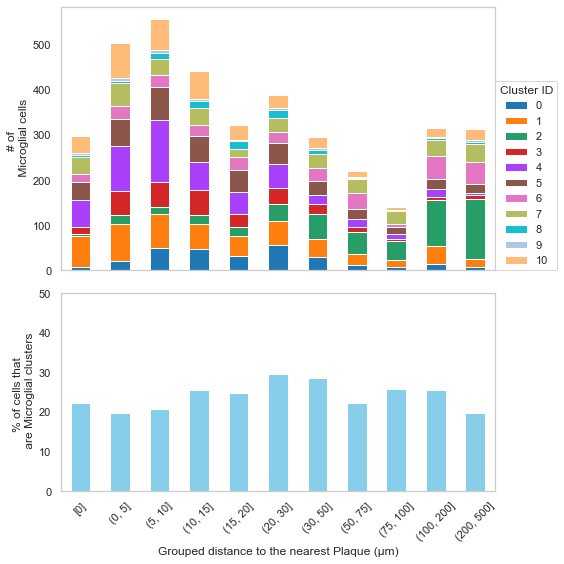

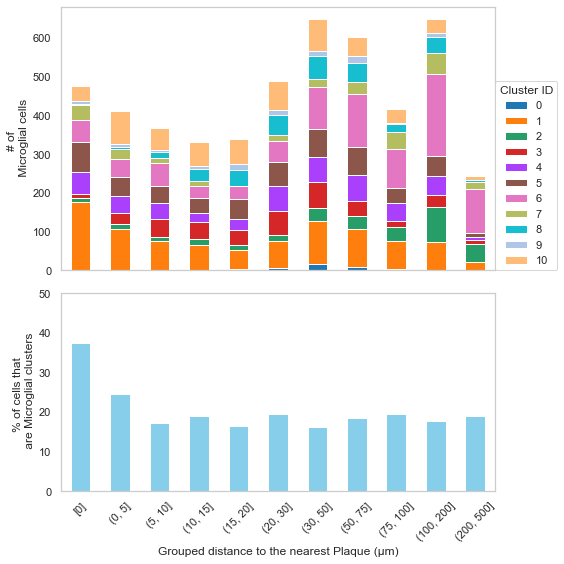

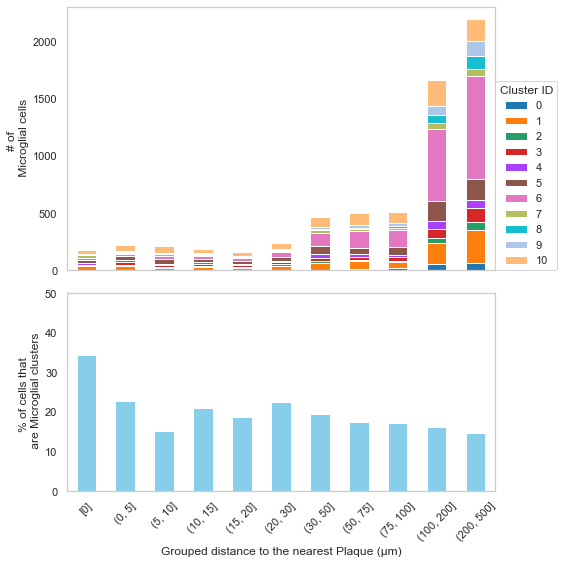

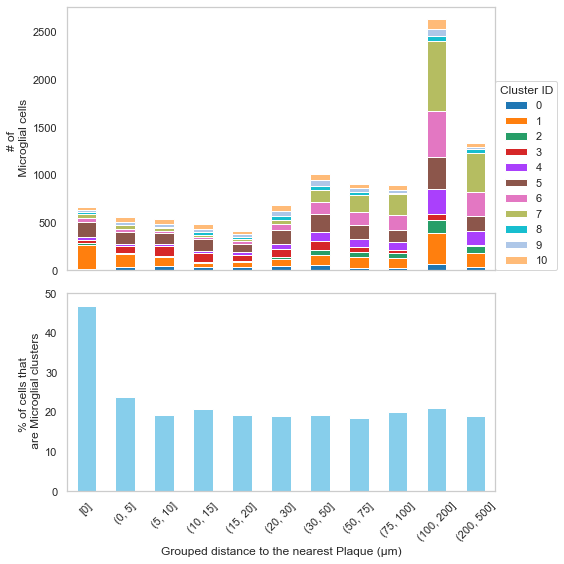

In [190]:
outDict =  {}
for sID in adata.obs['ImageID'].unique():
    if 'Ctl' in sID:
        continue
    ss = adata[adata.obs['ImageID']==sID]
    outDict[sID] = plot_microglial_clusters(ss)

Trying to set attribute `.obs` of view, copying.
... storing 'ImageID' as categorical
... storing 'ImageType' as categorical
... storing 'Parent' as categorical
... storing 'Region' as categorical


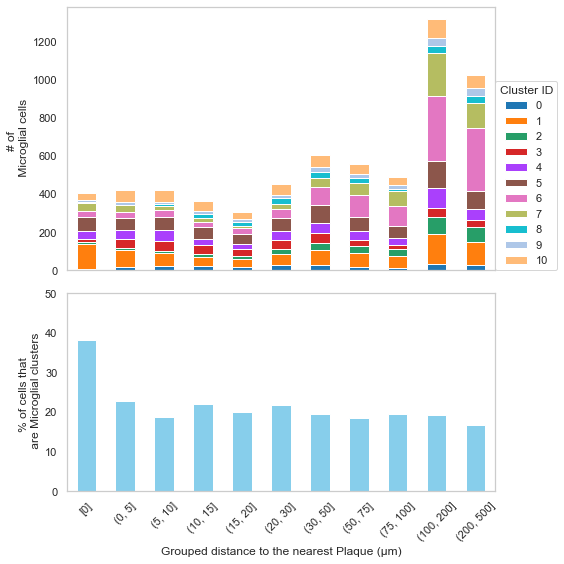

In [191]:

allAD = adata[adata.obs['ImageType']=='AD']
expectedDF = plot_microglial_clusters(allAD)

### $\chi^2$ test per cluster

In [226]:
from scipy.stats import chisquare
expectedDF.columns = expectedDF.columns.astype(str)
cId = 1
for sID in outDict.keys():
    outDict[sID].columns = outDict[sID].columns.astype(str)
    #normalize
    fObs = 100*outDict[sID].loc[cId]/outDict[sID].loc[cId].sum()
    #normalize
    fExp = 100*expectedDF.loc[cId]/expectedDF.loc[cId].sum()
    chi_stat, p_val = chisquare(fObs,
                                fExp, axis=None)
    print(f"For {sID} and cluster {cId}, Chi-square statistic = {chi_stat}, p-value = {p_val}")

For AD-3 and cluster 1, Chi-square statistic = 41.92830306304441, p-value = 7.722173690214326e-06
For AD-2 and cluster 1, Chi-square statistic = 19.45977476333092, p-value = 0.034796821679753086
For AD-1 and cluster 1, Chi-square statistic = 55.08027755071415, p-value = 3.0508742221602867e-08
For AD-4 and cluster 1, Chi-square statistic = 4.775361266589891, p-value = 0.90567000895645


### $\chi^2$ test per distance

In [231]:
## Compute per distance
from scipy.stats import chisquare
expectedDF.columns = expectedDF.columns.astype(str)
#only farthest cells
colID = expectedDF.columns[0]
for sID in outDict.keys():
    #normalize obsVal 
    obsVal = 100*outDict[sID].loc[:,colID]/ outDict[sID].loc[:,colID].sum()
    expVal = 100*expectedDF.loc[:,colID]/ expectedDF.loc[:,colID].sum()
    chi_stat, p_val = chisquare(obsVal, 
                                f_exp=expVal, axis=None)
    print(f"For {sID} at distance {colID}, Chi-square statistic = {chi_stat}, p-value = {p_val}")

For AD-3 at distance (-1, 0], Chi-square statistic = 17.62406994877575, p-value = 0.06164596442887485
For AD-2 at distance (-1, 0], Chi-square statistic = 7.343768651483395, p-value = 0.6926411576785444
For AD-1 at distance (-1, 0], Chi-square statistic = 24.926858318309826, p-value = 0.005485881040310199
For AD-4 at distance (-1, 0], Chi-square statistic = 8.809972507006295, p-value = 0.5502279815348534


In [158]:
import numpy as np
def getDynamicRange(ss, marker = 'IBA1', cluster = 8):
    ss.obs.reset_index(drop=True, inplace=True)
    subAD = ss[:,marker]
    subAD.obs.reset_index(drop=True, inplace=True)
    minVal = subAD[subAD.obs.leiden==cluster].X.min()
    maxVal = subAD[subAD.obs.leiden==cluster].X.max()
    meanVal = np.mean(subAD[subAD.obs.leiden==cluster].X.flatten())
    print(f"{marker} avg. pixel intensity range for cluster: {cluster} is:", 
          minVal, "-", maxVal,"and mean of", 
          meanVal)
    return {'dynamic Range':str(minVal)+"-"+str(maxVal), 'mean':meanVal}

In [159]:
marker = 'IBA1'
ss[:,marker]

View of AnnData object with n_obs × n_vars = 4521 × 1
    obs: 'Unnamed: 0', 'spatial_X', 'spatial_Y', 'Area', 'Area (µm^2)', 'ImageID', 'ImageType', 'Parent', 'Distance to nearest Plaque (µm)', 'numCellCentroids', 'Region', 'leiden'

In [166]:
outDF_cluster7 = pd.DataFrame(columns=['dynamic Range', 'mean'], index=sorted(adata.obs['ImageID'].unique()))
outDF_cluster9 = pd.DataFrame(columns=['dynamic Range', 'mean'], index=sorted(adata.obs['ImageID'].unique()))

for sID in sorted(adata.obs['ImageID'].unique()):
    ss = adata[adata.obs['ImageID']==sID]
    oDict = getDynamicRange(ss, 'IBA1', 7)
    for col in outDF_cluster7.columns:
        outDF_cluster7.loc[sID, col] = oDict[col]
    oDict = getDynamicRange(ss, 'IBA1', 9)
    for col in outDF_cluster7.columns:
        outDF_cluster9.loc[sID, col] = oDict[col]

IBA1 avg. pixel intensity range for cluster: 7 is: 26.101233 - 166.94249 and mean of 88.18655
IBA1 avg. pixel intensity range for cluster: 9 is: 0.0 - 59.259106 and mean of 11.346677
IBA1 avg. pixel intensity range for cluster: 7 is: 36.760868 - 178.14629 and mean of 89.31349
IBA1 avg. pixel intensity range for cluster: 9 is: 0.0 - 81.88108 and mean of 19.797182
IBA1 avg. pixel intensity range for cluster: 7 is: 37.639656 - 164.89075 and mean of 90.26963
IBA1 avg. pixel intensity range for cluster: 9 is: 0.7292378 - 65.56167 and mean of 22.891281
IBA1 avg. pixel intensity range for cluster: 7 is: 22.74788 - 179.9927 and mean of 88.79589
IBA1 avg. pixel intensity range for cluster: 9 is: 0.0 - 83.539734 and mean of 11.928633
IBA1 avg. pixel intensity range for cluster: 7 is: 27.475525 - 142.19417 and mean of 70.88533
IBA1 avg. pixel intensity range for cluster: 9 is: 0.0 - 48.40206 and mean of 14.55076
IBA1 avg. pixel intensity range for cluster: 7 is: 48.420174 - 182.01973 and mean of 

In [169]:
pd.concat([outDF_cluster7, outDF_cluster9], axis=1).to_clipboard()